In [ ]:
import random
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet

In [ ]:
def get_key(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key

In [ ]:
def divisible_by_3(num):
  indexable = str(num)
  threeSum = sum([int(char) for char in indexable])
  if threeSum % 3 == 0:
    return True

def divisible_by_7(num):
  if num < 7 or (len(str(num)) == 1 and num != 7):
    return False
  if num % 7 == 0:
    return True
  indexable = str(num)
  lastdig = int(indexable[-1])
  everythingelse = int(indexable[:-1])
  mod = everythingelse - 2*lastdig
  if mod % 7 != 0:
    return divisible_by_7(mod)
  else:
    return True



In [ ]:
def divisible(num):
  indexable = str(num)
  factors = [1]
  if num % 2 == 0:
    factors.append(2)
  if divisible_by_3(num):
    factors.append(3)
  if len(indexable) >= 2:
    lastTwo = int(indexable[-2:])
    if lastTwo % 4 == 0:
      factors.append(4)
  if indexable[-1] == '5' or indexable[-1] == '0':
    factors.append(5)
  if num % 3 == 0 and num % 2 == 0:
    factors.append(6)
  if divisible_by_7(num):
    factors.append(7)
  if len(indexable) >= 3:
    if int(indexable[-3:]) % 8 == 0:
      factors.append(8)
  if num > 6 and divisible_by_3(num):
    factors.append(9)
  if indexable[-1] == '0':
    factors.append(10)
  return factors

In [ ]:
def miller_rabin(n, time_sec = 6):
    isPrime = False
    N = n - 1
    m = 0
    k = 0
    mIsWhole = (str(m)[-1] != '0')
    while mIsWhole:
        m = N / (2 ** k)
        k += 1
    k -= 2
    m = int(N / (2 ** k))
    a = random.randint(1, N)
    b0 = pow(a, m, n)
    print(b0)
    if b0 == 1 or b0 == - 1:
        isPrime = True
    else:
        g = b0
        b1 = pow(g, 2, n)
        one = (b1 == 1 or b1 == - 1)
        if not one:
            start_time = time.time()
            end_time = start_time + time_sec
            while time.time() < end_time and not one:
                b1 = pow(b1, 2, n)
                one = (b1 == 1 or b1 == - 1)
        if b1 == 1:
            isPrime = False
        if b1 == - 1:
            isPrime = True
    return isPrime


In [ ]:
def sieve(lim, n):
  odds = set(np.arange(3, n + 1, 2).tolist())
  copy = list(odds)
  for num in list(odds):
    for nextnum in list(odds):
      if num == nextnum:
        continue
      if nextnum % num == 0:
        copyidx = copy.index(nextnum)
        copy.pop(copyidx)
        odds.remove(nextnum)
  copy2 = set(copy)
  copy2.add(lim)
  copy3 = [2] + list(SortedSet(copy2))
  limIDX = copy3.index(lim)
  return SortedSet(set(copy3[limIDX + 1:]))

In [ ]:
import numpy as np
from sortedcontainers import SortedSet

def slieve(lim, n):
    odds = set(np.arange(3, n + 1, 2))
    sqrt_n = int(np.sqrt(n)) + 1

    for num in range(3, sqrt_n, 2):
        if num in odds:
            odds.difference_update(range(num * num, n + 1, num))

    copy2 = SortedSet(odds)
    copy2.add(lim)
    copy3 = SortedSet([2])
    copy3.update(copy2)
    limIDX = copy3.index(lim)

    return SortedSet(copy3[limIDX + 1:])


In [ ]:
def twin_primes(lim, n):
  lit = list(slieve(lim, n))
  gapdict = {lit[0]: 0}
  #twinPrimes = set()
  twins = []
  for i in range(1, len(lit)):
    gapdict[lit[i]] = lit[i] - lit[i-1]
  for key in gapdict:
    currIDX = lit.index(key)
    previousIDX = currIDX - 1
    twin = [0]*2
    if gapdict[key] == 2:
      #twinPrimes.add(key)
      #twinPrimes.add(key - 2)
      twin[0] = key - 2
      twin[1] = key
      twins.append(twin)
  #return SortedSet(twinPrimes)
  return set(map(tuple, sorted(twins)))

def maxPrimeGap(lim, n):
  lit = list(sieve(lim, n))
  gapdict = {lit[0]: 0}
  #twinPrimes = set()
  twins = []
  for i in range(1, len(lit)):
    gapdict[lit[i]] = lit[i] - lit[i-1]
  valList = list(gapdict.values())
  keyList = list(gapdict.keys())
  maxGap = max(valList)
  maxGapIDX = valList.index(maxGap)
  secPrime = keyList[maxGapIDX]
  firstPrime = secPrime - maxGap
  return firstPrime, secPrime, maxGap



In [ ]:
maxPrimeGap(2, 10000)

(9551, 9587, 36)

In [ ]:
twin_primes(3001, 5001)

{(3119, 3121),
 (3167, 3169),
 (3251, 3253),
 (3257, 3259),
 (3299, 3301),
 (3329, 3331),
 (3359, 3361),
 (3371, 3373),
 (3389, 3391),
 (3461, 3463),
 (3467, 3469),
 (3527, 3529),
 (3539, 3541),
 (3557, 3559),
 (3581, 3583),
 (3671, 3673),
 (3767, 3769),
 (3821, 3823),
 (3851, 3853),
 (3917, 3919),
 (3929, 3931),
 (4001, 4003),
 (4019, 4021),
 (4049, 4051),
 (4091, 4093),
 (4127, 4129),
 (4157, 4159),
 (4217, 4219),
 (4229, 4231),
 (4241, 4243),
 (4259, 4261),
 (4271, 4273),
 (4337, 4339),
 (4421, 4423),
 (4481, 4483),
 (4517, 4519),
 (4547, 4549),
 (4637, 4639),
 (4649, 4651),
 (4721, 4723),
 (4787, 4789),
 (4799, 4801),
 (4931, 4933),
 (4967, 4969)}

In [ ]:
def primesLT(num):
  primes = list(sieve(2,num))
  if num in primes:
    return len(primes) - 1
  return len(primes)

def twinPrimesLT(num):
  twinPrimes = list(twin_primes(2, num))
  if num in twinPrimes:
    return len(twinPrimes) - 1
  return len(twinPrimes)


In [ ]:
twinPrimesLT(1001)

35

In [ ]:
def isPalindrome(num):

  strung = str(num)
  reversed = strung[::-1]
  if strung == reversed:
    return True
  else:
    return False

def palindromePrimes(lim, num):
  primes = list(slieve(lim ,num))
  palPrimes = [primes[i] for i in range(len(primes)) if isPalindrome(primes[i]) and len(str(primes[i])) > 1]
  return SortedSet(set(palPrimes))

In [ ]:
palindromePrimes(0, 10000)

SortedSet([11, 101, 131, 151, 181, 191, 313, 353, 373, 383, 727, 757, 787, 797, 919, 929])

In [ ]:
def prime_spiral(lim, num):
  x = slieve(lim, num)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='polar')
  ax.scatter(x, x, s = 3.2)

  ax.set_rticks([])
  ax.set_title("Prime Spiral from " + str(lim) + ' to ' + str(num))
  ax.grid(True)
  plt.show()


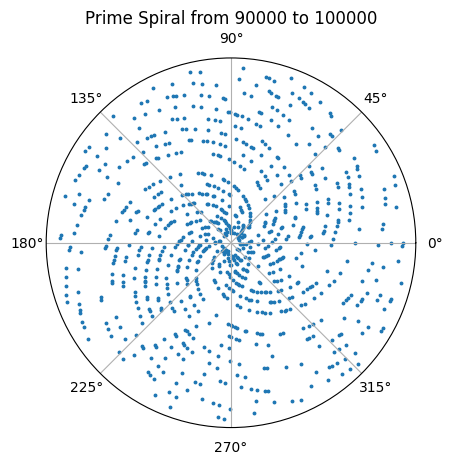

In [ ]:
prime_spiral(90000, 100000)